# BUAN 6341.002 Applied Machine Learning Project

## Airline Passenger Satisfaction

In [314]:
# for data analytics
import numpy as np
import pandas as pd  

# The two packages below are for plotting
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

In [315]:
# data loading
data = pd.read_csv('airline_passenger_satisfaction.csv')

In [316]:
#Displaying the top ten rows in the dataset
data.head(10)

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,2,3,4,2,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,3,3,5,3,3,4,4,5,4,3,3,3,3,Satisfied
5,6,Male,43,Returning,Business,Business,3788,0,0.0,4,4,3,5,4,4,4,4,3,3,4,4,4,4,Satisfied
6,7,Male,43,Returning,Business,Business,1963,0,0.0,3,3,4,4,3,5,5,5,4,5,5,3,5,5,Satisfied
7,8,Female,60,Returning,Business,Business,853,0,3.0,3,4,3,4,4,3,4,4,4,4,3,4,3,3,Satisfied
8,9,Male,50,Returning,Business,Business,2607,0,0.0,1,1,3,2,1,4,3,4,3,3,4,4,4,4,Neutral or Dissatisfied
9,10,Female,38,Returning,Business,Business,2822,13,0.0,2,5,3,5,2,5,4,5,4,2,5,2,5,5,Satisfied


In [317]:
# shape of the dataframe
data.shape   #There are 129880 observations and 24 variables/columns

(129880, 24)

In [318]:
duplicates = data['ID'].duplicated()
print(data[duplicates])


Empty DataFrame
Columns: [ID, Gender, Age, Customer Type, Type of Travel, Class, Flight Distance, Departure Delay, Arrival Delay, Departure and Arrival Time Convenience, Ease of Online Booking, Check-in Service, Online Boarding, Gate Location, On-board Service, Seat Comfort, Leg Room Service, Cleanliness, Food and Drink, In-flight Service, In-flight Wifi Service, In-flight Entertainment, Baggage Handling, Satisfaction]
Index: []


In [319]:
# variable names
data.columns

Index(['ID', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

In [320]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [321]:
data['Arrival Delay'].isnull().sum()

393

In [322]:
#The missing values are imputed with the mean of the column values.
data['Arrival Delay']=data['Arrival Delay'].fillna(data['Arrival Delay'].mean())

In [323]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129880 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [324]:
data.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,997.452477,38.071126,38.407410,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [325]:
## multivariate data analysis

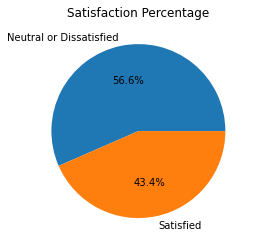

In [326]:
category_counts = data['Satisfaction'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
# Set the title
plt.title('Satisfaction Percentage')
# Display the chart
plt.show()

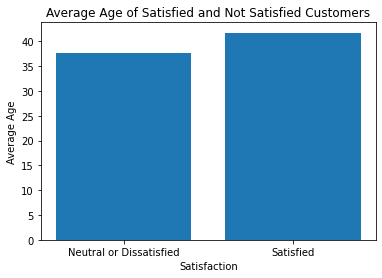

In [327]:
average_age = data.groupby('Satisfaction')['Age'].mean()
plt.bar(average_age.index, average_age)
plt.xlabel('Satisfaction')
plt.ylabel('Average Age')
plt.title('Average Age of Satisfied and Not Satisfied Customers')
plt.show()


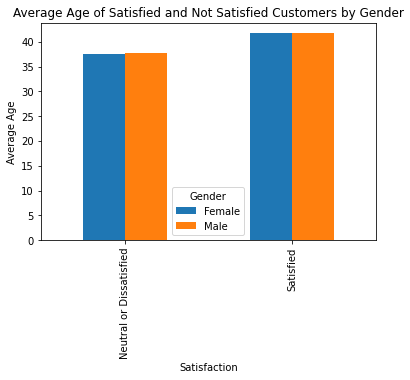

In [328]:
average_age_by_gender = data.groupby(['Satisfaction','Gender'])['Age'].mean().unstack()
average_age_by_gender.plot(kind='bar')

plt.xlabel('Satisfaction')
plt.ylabel('Average Age')
plt.title('Average Age of Satisfied and Not Satisfied Customers by Gender')
plt.show()


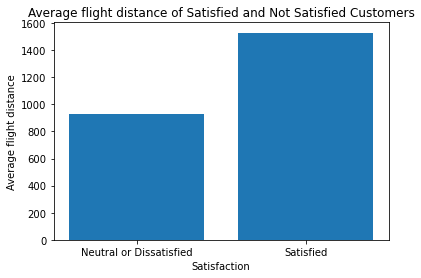

In [329]:
average_flight_distance = data.groupby('Satisfaction')['Flight Distance'].mean()
plt.bar(average_flight_distance.index, average_flight_distance)

plt.xlabel('Satisfaction')
plt.ylabel('Average flight distance')
plt.title('Average flight distance of Satisfied and Not Satisfied Customers')
plt.show()

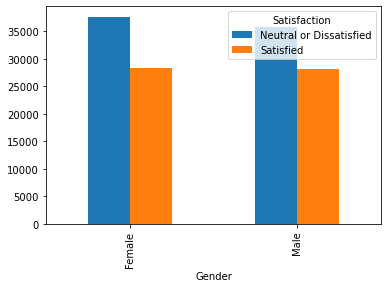

In [330]:
gender_satisfaction = data.groupby(['Gender', 'Satisfaction']).size().unstack()
gender_satisfaction.plot(kind='bar')
plt.show()

In [331]:
# Correlation matrix
df = data.drop(columns = ['ID', 'Gender', 'Customer Type', 'Type of Travel','Class'])
my_matrix = df.corr()
my_matrix


,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
Age,1.000000,0.099459,-0.009041,-0.011229,0.036960,0.022565,0.033475,0.207572,-0.000398,0.057078,0.159136,0.039119,0.052565,0.023194,-0.051347,0.016116,0.074947,-0.047991
Flight Distance,0.099459,1.000000,0.002402,-0.001932,-0.018914,0.065165,0.073608,0.214825,0.005520,0.111194,0.157662,0.134533,0.095648,0.057066,0.059316,0.006701,0.130507,0.064855
Departure Delay,-0.009041,0.002402,1.000000,0.960329,0.000778,-0.005318,-0.018752,-0.019404,0.005973,-0.030486,-0.027999,0.014574,-0.014543,-0.029164,-0.054432,-0.015946,-0.027012,-0.004105
Arrival Delay,-0.011229,-0.001932,0.960329,1.000000,-0.000941,-0.007022,-0.021671,-0.022694,0.005649,-0.034735,-0.030472,0.011327,-0.016520,-0.031666,-0.059759,-0.017721,-0.030187,-0.007923
Departure and Arrival Time Convenience,0.036960,-0.018914,0.000778,-0.000941,1.000000,0.437620,0.091132,0.072287,0.447510,0.067297,0.008666,0.010617,0.009862,0.000687,0.072195,0.344915,-0.008380,0.070833
Ease of Online Booking,0.022565,0.065165,-0.005318,-0.007022,0.437620,1.000000,0.008819,0.404866,0.460041,0.039064,0.028561,0.109450,0.015125,0.030514,0.035373,0.714807,0.046564,0.039148
Check-in Service,0.033475,0.073608,-0.018752,-0.021671,0.091132,0.008819,1.000000,0.204238,-0.039353,0.244619,0.189979,0.152693,0.176658,0.085198,0.237601,0.043762,0.119554,0.234503
Online Boarding,0.207572,0.214825,-0.019404,-0.022694,0.072287,0.404866,0.204238,1.000000,0.002756,0.154242,0.419253,0.123225,0.329377,0.233500,0.074058,0.457445,0.283922,0.083541
Gate Location,-0.000398,0.005520,0.005973,0.005649,0.447510,0.460041,-0.039353,0.002756,1.000000,-0.029019,0.002788,-0.005181,-0.005918,-0.002872,0.000310,0.338573,0.002741,0.000972
On-board Service,0.057078,0.111194,-0.030486,-0.034735,0.067297,0.039064,0.244619,0.154242,-0.029019,1.000000,0.130545,0.357721,0.122084,0.057404,0.551569,0.119928,0.418574,0.520296


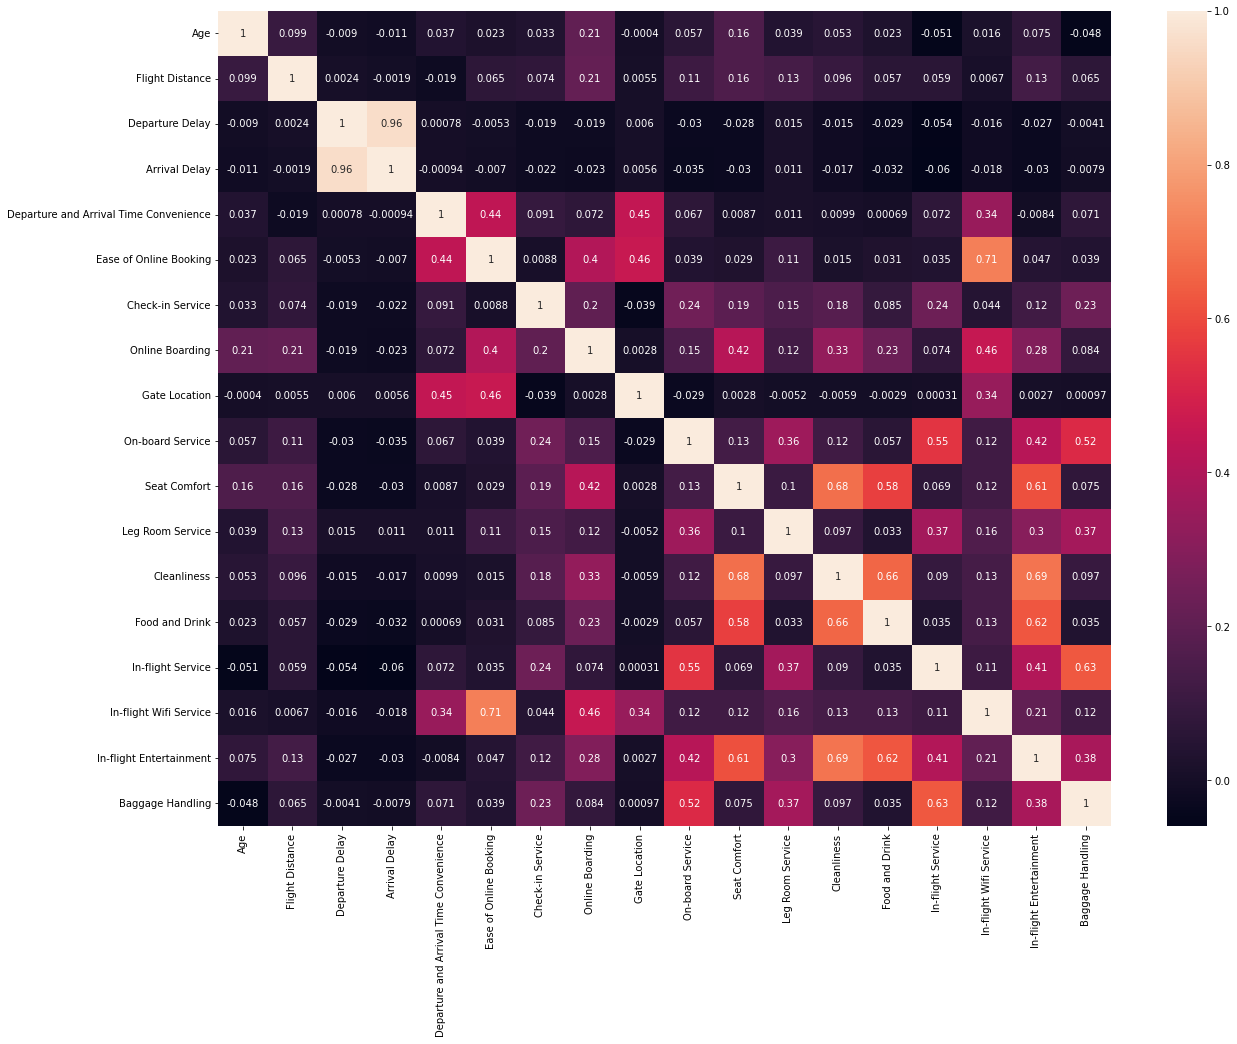

In [332]:
# heatmap
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Flight Distance'}>,
        <AxesSubplot:title={'center':'Departure Delay'}>,
        <AxesSubplot:title={'center':'Arrival Delay'}>],
       [<AxesSubplot:title={'center':'Departure and Arrival Time Convenience'}>,
        <AxesSubplot:title={'center':'Ease of Online Booking'}>,
        <AxesSubplot:title={'center':'Check-in Service'}>,
        <AxesSubplot:title={'center':'Online Boarding'}>],
       [<AxesSubplot:title={'center':'Gate Location'}>,
        <AxesSubplot:title={'center':'On-board Service'}>,
        <AxesSubplot:title={'center':'Seat Comfort'}>,
        <AxesSubplot:title={'center':'Leg Room Service'}>],
       [<AxesSubplot:title={'center':'Cleanliness'}>,
        <AxesSubplot:title={'center':'Food and Drink'}>,
        <AxesSubplot:title={'center':'In-flight Service'}>,
        <AxesSubplot:title={'center':'In-flight Wifi Service'}>],
       [<AxesSubplot:title={'center':'In-flight En

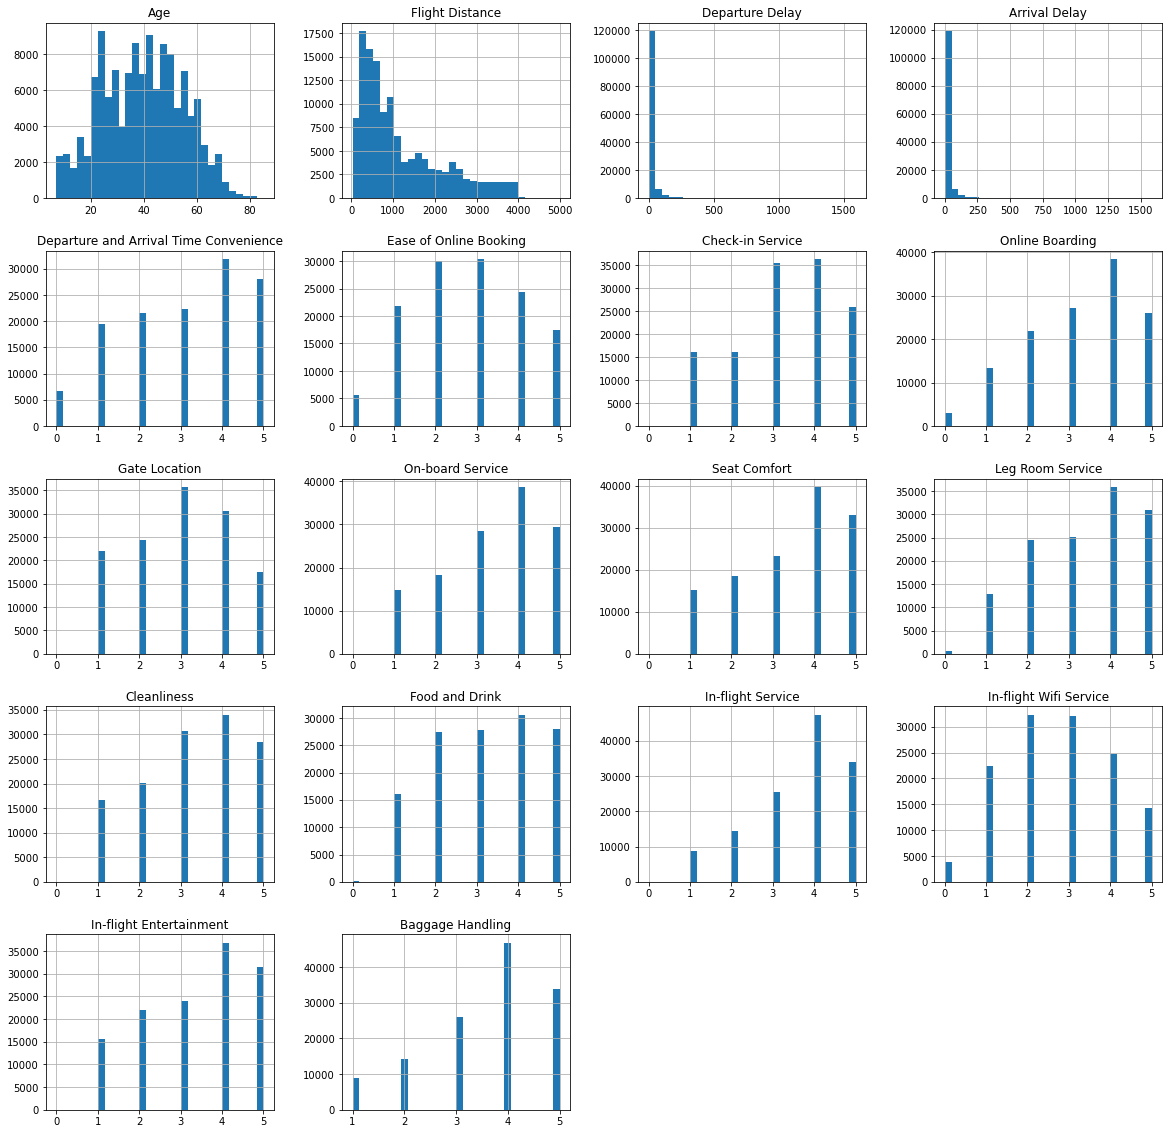

In [333]:
df.hist(bins=30,figsize=[20,20])

In [334]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 19 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Age                                     129880 non-null  int64  
 1   Flight Distance                         129880 non-null  int64  
 2   Departure Delay                         129880 non-null  int64  
 3   Arrival Delay                           129880 non-null  float64
 4   Departure and Arrival Time Convenience  129880 non-null  int64  
 5   Ease of Online Booking                  129880 non-null  int64  
 6   Check-in Service                        129880 non-null  int64  
 7   Online Boarding                         129880 non-null  int64  
 8   Gate Location                           129880 non-null  int64  
 9   On-board Service                        129880 non-null  int64  
 10  Seat Comfort                            1298

In [335]:
data.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,2,3,4,2,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,3,3,5,3,3,4,4,5,4,3,3,3,3,Satisfied


In [336]:
data['Satisfaction2'] = np.where(data['Satisfaction']== 'Satisfied', 1, 0)
data.drop('Satisfaction', inplace=True, axis=1)
data = data.rename(columns={'Satisfaction2': 'Satisfied'})

In [337]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [338]:
data.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfied
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,0
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5,1
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3,1
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,2,3,4,2,5,5,5,4,4,5,2,5,5,1
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,3,3,5,3,3,4,4,5,4,3,3,3,3,1


In [339]:
from scipy.stats import chi2_contingency

In [340]:
#Null Hypothesis: There is no difference in satisfaction levels between first-time and returning customers.

#Alternative Hypothesis: There is a difference in satisfaction levels between first-time and returning customers.


# Create a cross-tabulation of 'customer type' and 'satisfaction'
cross_tab = pd.crosstab(data['Customer Type'], data['Satisfied'])

# Perform the chi-square test
chi2, p_value, _, _ = chi2_contingency(cross_tab)

# Print the observed frequencies
print("Observed Frequencies:")
print(cross_tab)

# Print the chi-square statistic and p-value
print("Chi-square Statistic: ", chi2)
print("P-value: ", p_value)

#reject the null hypothesis

Observed Frequencies:
Satisfied          0      1
Customer Type              
First-time     18080   5700
Returning      55372  50728
Chi-square Statistic:  4493.188803283598
P-value:  0.0


In [341]:
X = data.drop(columns = ['Satisfied','ID','Departure Delay'])
y = data['Satisfied']

In [342]:
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [343]:
X.head()

,Age,Flight Distance,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Gender_Male,Customer Type_Returning,Type of Travel_Personal,Class_Economy,Class_Economy Plus
0,48,821,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,1,0,0,0,0
1,35,821,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5,0,1,0,0,0
2,41,853,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3,1,1,0,0,0
3,50,1905,0.0,2,2,3,4,2,5,5,5,4,4,5,2,5,5,1,1,0,0,0
4,49,3470,1.0,3,3,3,5,3,3,4,4,5,4,3,3,3,3,0,1,0,0,0


In [344]:
import statsmodels.api as sm

logit_model = sm.Logit(y_train, sm.add_constant(X_train))
logit_results = logit_model.fit()

#Predict the labels for the test set
y_pred = logit_results.predict(sm.add_constant(X_test))

# Convert predicted probabilities to binary labels
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC:", roc_auc)

coefficients = logit_results.params
feature_names = X.columns
p_values = logit_results.pvalues


Optimization terminated successfully.
         Current function value: 0.334637
         Iterations 7
Accuracy: 0.8724720254593984
ROC AUC: 0.9261914748511668


In [345]:
# Check the significance of each variable

#Null: null hypothesis states that the coefficient for a particular predictor is zero (not significant)
#Alternative: alternative hypothesis suggests that the coefficient is not zero (significant)

#p-value is less than the significance level (e.g., p-value < 0.05), reject Null. It suggests that the variable is 
#statistically significant and likely to have an effect on the outcome


for feature,p_value,coefficient in zip(feature_names, p_values, coefficients):
    if abs(p_value) <0.05:  # Using 95% confidence interval
        print(f"{feature} is significant with coefficient of {coefficient}")
    else:
        print(f"{feature} is not  significant with {coefficient}.")

#as the Age increases, the log-odds of customer satisfaction decrease.the odds ratio is 0.000446.
#For each one-unit increase in Age, the odds of customer satisfaction decrease by a factor of 0.000446

Age is significant with coefficient of -7.753723660757523
Flight Distance is significant with coefficient of -0.009803312187976141
Arrival Delay is not  significant with -1.2802193529492298e-05.
Departure and Arrival Time Convenience is significant with coefficient of -0.004898806591576309
Ease of Online Booking is significant with coefficient of -0.1383964564520861
Check-in Service is significant with coefficient of -0.15315523633713155
Online Boarding is significant with coefficient of 0.3292312151116243
Gate Location is significant with coefficient of 0.6074053659998873
On-board Service is significant with coefficient of 0.027656100008092183
Seat Comfort is significant with coefficient of 0.3041156396277124
Leg Room Service is significant with coefficient of 0.06392798191831142
Cleanliness is significant with coefficient of 0.24415013896766968
Food and Drink is significant with coefficient of 0.22571772682448923
In-flight Service is significant with coefficient of -0.030302867525351

In [346]:
#Decision Tree

In [347]:
from sklearn.tree import DecisionTreeClassifier
tree_complete = DecisionTreeClassifier(random_state = 0, criterion = 'entropy')
tree_complete.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [348]:
print("Accuracy of test is:",tree_complete.score(X_test, y_test))
print("Accuracy of training is:",tree_complete.score(X_train, y_train))

Accuracy of test is: 0.9476696437737399
Accuracy of training is: 1.0


In [349]:
#Addressing Overfitting
opt_tree = DecisionTreeClassifier(random_state = 0, criterion = 'entropy')

dt_params = {'max_depth':  range(1,8)         ,
             'min_samples_split':   range(2,8),
             'max_leaf_nodes':    range(2,8)   }

grid_tree = GridSearchCV(opt_tree, dt_params)

grid_tree.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=0),
             param_grid={'max_depth': range(1, 8),
                         'max_leaf_nodes': range(2, 8),
                         'min_samples_split': range(2, 8)})

In [350]:
print("Accuracy of test is:",grid_tree.score(X_test, y_test))
print("Accuracy of training is:",grid_tree.score(X_train, y_train))

Accuracy of test is: 0.8822759470280259
Accuracy of training is: 0.885300717145497


In [351]:
grid_tree.best_params_

{'max_depth': 3, 'max_leaf_nodes': 7, 'min_samples_split': 2}

In [352]:
y_test_pred_dt = grid_tree.predict(X_test)

In [353]:
rslt_dt = confusion_matrix(y_test, y_test_pred_dt)
rslt_dt
print("TP is:", rslt[1, 1])
print("TN is:", rslt[0, 0])
print("FP is:", rslt[0 ,1])
print("FN is:", rslt[1, 0])

TP is: 13697
TN is: 18683
FP is: 3427
FN is: 3157


In [354]:
print('Precision score:', precision_score(y_test, y_test_pred_dt))
print('Recall score:', recall_score(y_test, y_test_pred_dt))
print('Accuracy score:', accuracy_score(y_test, y_test_pred_dt))
print('F1 score:', f1_score(y_test, y_test_pred_dt))

proba_dt = grid_tree.predict_proba(X_test)[:, 1]

Precision score: 0.8359533329681766
Recall score: 0.9055417111664886
Accuracy score: 0.8822759470280259
F1 score: 0.869357181510068


In [355]:
precision, recall, threshold = precision_recall_curve(y_test, proba_dt)

AUC for Decision Tree : 0.9197488264471787


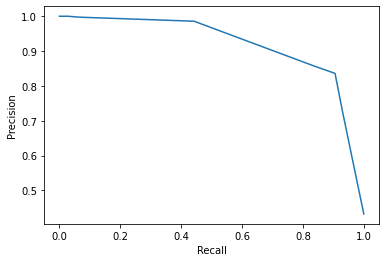

In [356]:
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
print("AUC for Decision Tree :", roc_auc_score(y_test, proba_dt))

Text(0, 0.5, 'TPR')

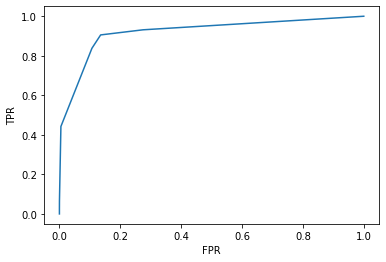

In [357]:
fpr, tpr, threshold = roc_curve(y_test, proba_dt)
# Generate Figure
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [358]:
#Ensemble method (DT With Bagging)

In [359]:
from sklearn.ensemble import BaggingClassifier
dt=DecisionTreeClassifier(random_state=42)

In [360]:
bag_clf = BaggingClassifier(
    dt, n_estimators=200,
    max_samples=100, bootstrap=True, random_state=42)

In [361]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  max_samples=100, n_estimators=200, random_state=42)

In [362]:
y_pred = bag_clf.predict(X_test)
print("Accuracy of test is:",bag_clf.score(X_test, y_test))
print("Accuracy of training is:",bag_clf.score(X_train, y_train))

Accuracy of test is: 0.9080433220408582
Accuracy of training is: 0.9108517752650799


In [363]:
y_test_pred_em = bag_clf.predict(X_test)

In [364]:
rslt_em = confusion_matrix(y_test, y_test_pred_em)
rslt_em
print("TP is:", rslt[1, 1])
print("TN is:", rslt[0, 0])
print("FP is:", rslt[0 ,1])
print("FN is:", rslt[1, 0])

TP is: 13697
TN is: 18683
FP is: 3427
FN is: 3157


In [365]:
print('Precision score:', precision_score(y_test, y_test_pred_em))
print('Recall score:', recall_score(y_test, y_test_pred_em))
print('Accuracy score:', accuracy_score(y_test, y_test_pred_em))
print('F1 score:', f1_score(y_test, y_test_pred_em))

proba_em = bag_clf.predict_proba(X_test)[:, 1]

Precision score: 0.9005251403392286
Recall score: 0.8851904592381631
Accuracy score: 0.9080433220408582
F1 score: 0.8927919571526884


In [366]:
precision, recall, threshold = precision_recall_curve(y_test, proba_em)

AUC for Decision Tree : 0.9659965032384706


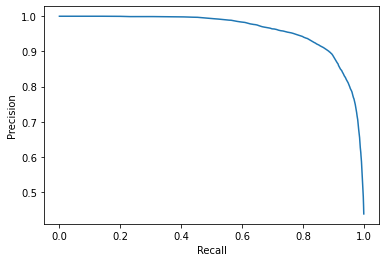

In [367]:
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
print("AUC for Decision Tree :", roc_auc_score(y_test, proba_em))

Text(0, 0.5, 'TPR')

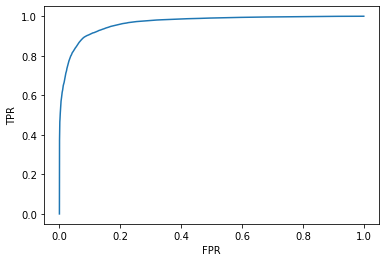

In [368]:
fpr, tpr, threshold = roc_curve(y_test, proba_em)
# Generate Figure
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [369]:
#Random Forest

In [370]:
from sklearn.ensemble import RandomForestClassifier

In [371]:
rnd_clf = RandomForestClassifier(n_estimators=200, max_samples=100, random_state=42)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(max_samples=100, n_estimators=200, random_state=42)

In [372]:
print("Accuracy of test is:",rnd_clf.score(X_test, y_test))
print("Accuracy of training is:",rnd_clf.score(X_train, y_train))

Accuracy of test is: 0.9027820552304692
Accuracy of training is: 0.9040652910378811


In [373]:
y_test_pred_rf = rnd_clf.predict(X_test)

In [374]:
rslt_rf = confusion_matrix(y_test, y_test_pred_rf)
rslt_rf
print("TP is:", rslt[1, 1])
print("TN is:", rslt[0, 0])
print("FP is:", rslt[0 ,1])
print("FN is:", rslt[1, 0])

TP is: 13697
TN is: 18683
FP is: 3427
FN is: 3157


In [375]:
print('Precision score:', precision_score(y_test, y_test_pred_rf))
print('Recall score:', recall_score(y_test, y_test_pred_rf))
print('Accuracy score:', accuracy_score(y_test, y_test_pred_rf))
print('F1 score:', f1_score(y_test, y_test_pred_rf))

proba_rf = rnd_clf.predict_proba(X_test)[:, 1]

Precision score: 0.9278883940267225
Recall score: 0.8405719710454491
Accuracy score: 0.9027820552304692
F1 score: 0.8820745906232488


In [376]:
precision, recall, threshold = precision_recall_curve(y_test, proba_rf)

AUC for Decision Tree : 0.9667999957278024


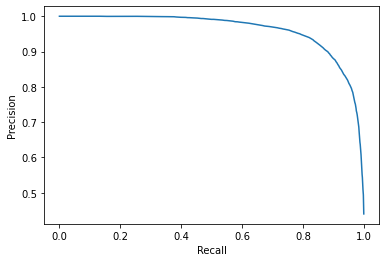

In [377]:
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
print("AUC for Decision Tree :", roc_auc_score(y_test, proba_rf))

Text(0, 0.5, 'TPR')

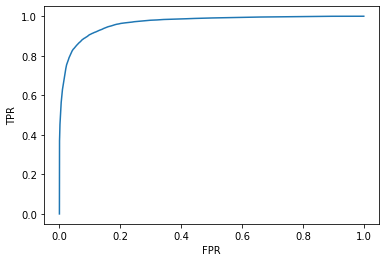

In [378]:
fpr, tpr, threshold = roc_curve(y_test, proba_rf)
# Generate Figure
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [379]:
rslt,rslt_dt,rslt_em,rslt_rf

(array([[18683,  3427],
        [ 3157, 13697]]),
 array([[19115,  2995],
        [ 1592, 15262]]),
 array([[20462,  1648],
        [ 1935, 14919]]),
 array([[21009,  1101],
        [ 2687, 14167]]))

In [380]:
# Extract feature importances
importances = rnd_clf.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Print the feature importances
print(feature_importance_df)

                                   Feature  Importance
6                          Online Boarding    0.132912
14                  In-flight Wifi Service    0.092582
19                 Type of Travel_Personal    0.073547
15                 In-flight Entertainment    0.070022
1                          Flight Distance    0.068267
20                           Class_Economy    0.067155
0                                      Age    0.056620
9                             Seat Comfort    0.054109
10                        Leg Room Service    0.044832
8                         On-board Service    0.042035
4                   Ease of Online Booking    0.041915
11                             Cleanliness    0.033157
13                       In-flight Service    0.032468
3   Departure and Arrival Time Convenience    0.031549
5                         Check-in Service    0.030880
16                        Baggage Handling    0.024887
2                            Arrival Delay    0.024825
12        